In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene

import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (10,8) 

## Pair Programming Test Estadísticos


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.


In [3]:
df=pd.read_csv("../datos/sephora_website_dataset.csv")
df.head(2)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0




1.
¿Qué diferencia existe entre el error de tipo I y el error de tipo II?



En el error de tipo I rechazamos la hipótesis nula cuando es *verdadera* , en cambio, en el error de tipo II la hipotésis nula es *falsa* y *no la rechazamos*. 

En el caso de nuestro dataset:



H0 = El rating no varía en función del love

H1 = El rating sí varía en función del love

Error tipo I: Pensamos que no hay relación cuando sí la hay
Error tipo II: Pensamos que sí hay relación, pero no la hay

Entonces el error de tipo II sería el que más nos afectaría, aunque ambos casos serían negativos para nuestro análisis

2.
¿Qué es la asimetría?


- La asimetría es una medida de la falta de simetría en la distribución de los datos.
Si la distribución es simétrica los valores se distribuyen uniformemente a ambos lados de la media. 
Si la distribución es asimétrica los valores se distribuyen de manera desigual de uno a otro lado de la media.
Si los datos tienen una distribución asimétrica puede ser más facil cometer un Error de tipo I al realizar la prueba de hipótesis.

Podemos tener tres tipos de asimetría según su relacion con mediana y moda: 
-  positiva: media > mediana y moda 
-  negativa: media < mediana y moda
-  simétrica: media = mediana y moda

Se puede medir con el método skew, que nos da resultados positivos, negativos o cero:

- simétrica: el valor es 0, distribución normal
- asimétrica positiva: valor positivo -> datos asimétricos positivos, no normales
- asimétrica negativa: valor negativo -> datos asimétricos negativos, no normales


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
from scipy.stats import skew

In [6]:
df["rating"].skew()

-2.7392778998136187

In [6]:
skew(df["rating"])

-2.7388296991585395

3.
¿Es vuestra variable respuesta asimétrica?


Sí lo es

4.
¿Qué tipo de curtosis presenta vuestra variable respuesta?


In [7]:

from scipy.stats import kurtosistest

In [8]:
kurtosistest(df['rating'])

KurtosistestResult(statistic=37.711811568241835, pvalue=0.0)

- Si la curtosis es mayor que 0, se puede decir que es Leptocurtica
- Si es menor que 0 se puede concluir que es platicurtica
- Si el valor es 0 es MESOCURTICA QUE ES EN NUESTO CASO.

5.
¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [9]:
df.shape

(9168, 21)

Nuestro dataframe tiene más de 5000 filas, así que usaremos el método analítico Kolmogorov Smirnov

In [10]:
from scipy.stats import kstest


In [11]:
kstest(df['rating'], 'norm')

KstestResult(statistic=0.9426341392117457, pvalue=0.0)

Nuestro p valor es < 0.5, podemos rechazar la H0 porque nuestros datos no son normales

Usando un displot intentaremos visualizar la normalidad de nuestros datos - de serlo, mostraría una campana de Gauss

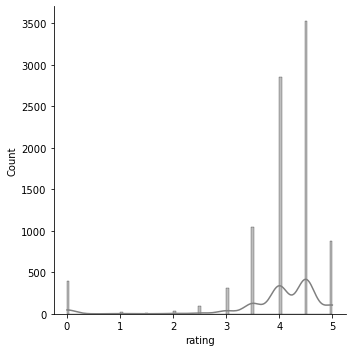

In [12]:


sns.displot(df['rating'], kde = True, color = "grey");



Vemos claramente que no son normales

Usamos el QQ plot para, de nuevo, mostrar de manera visual la normalidad de nuestros datos

/home/adalaber/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


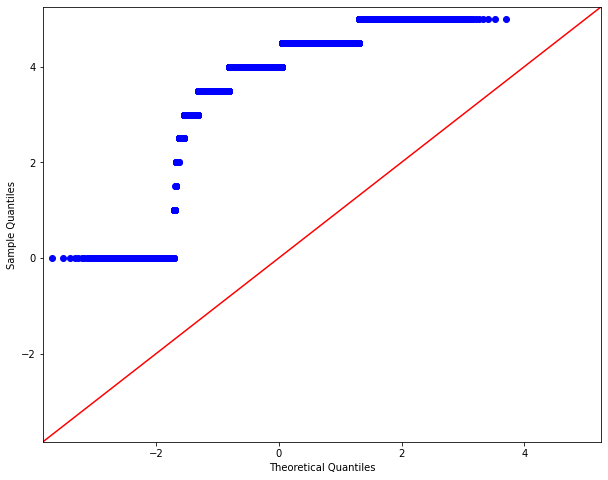

In [17]:


sm.qqplot(df['rating'], line ='45');



De nuevo una clarísima anormalidad